<a href="https://colab.research.google.com/github/MargarytaKyian/AiLabCollegeKyian/blob/main/LabAI3_4Kyian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

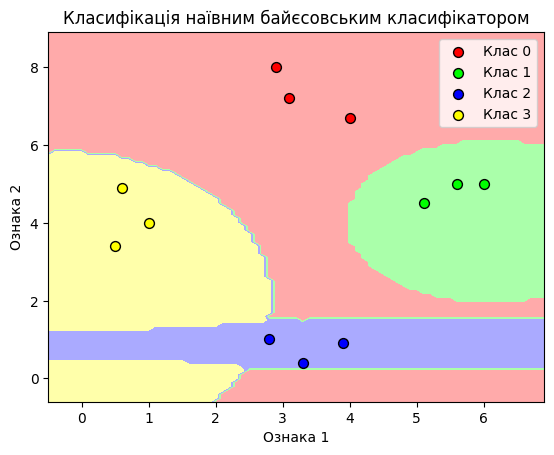

In [40]:
# Лаб.№3-4 ШІ. Киян М. ІПЗ-407
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB  # Імпорт наївного байєсовського класифікатора
from sklearn.model_selection import train_test_split  # Імпорт функції для розділення даних
from matplotlib.colors import ListedColormap

# Визначення зразка вхідних даних (X) та їх міток (y)
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5],
              [6, 5], [5.6, 5], [3.3, 0.4],
              [3.9, 0.9], [2.8, 1],
              [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Розділення даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Створення наївного байєсовського класифікатора
classifier = GaussianNB()

# Тренування класифікатора на тренувальних даних
classifier.fit(X_train, y_train)

# Визначення меж візуалізації на основі вхідних даних
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Створюємо сітку для графіку
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Прогнозування класів на основі сітки координат
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визначення кольорових палітр для візуалізації
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00']

# Візуалізація прогнозованих класів
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Візуалізація точок даних
for idx, color in enumerate(cmap_bold):
    plt.scatter(X[y == idx, 0], X[y == idx, 1],
                c=color, label=f"Клас {idx}", edgecolor='k', s=50)

# Додавання заголовка та підписів до осей
plt.title("Класифікація наївним байєсовським класифікатором")
plt.xlabel("Ознака 1")  # Підпис осі X
plt.ylabel("Ознака 2")  # Підпис осі Y
plt.legend()  # Відображення легенди
plt.show()  # Показати графік
